##Libraries

In [ ]:
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [ ]:
install.packages("resample")
library(resample)

In [ ]:
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [ ]:
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



In [ ]:
install.packages("lme4")
library(lme4)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




In [ ]:
install.packages("nnet")
library(nnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("pROC")
library(pROC)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [ ]:
install.packages("plotly")
library(plotly)
install.packages("fastDummies")
#library(tidymodels)
library(fastDummies)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Thank you for using fastDummies!

To acknowledge our work, please cite the package:

Kaplan, J. & Schlegel, B. (2023). fastDummies: Fast Creation of Dummy (Binary) Columns and Rows from Categorical Variables. Version 1.7.1. URL: https://github.com/jacobkap/fastDummies, https://jacobkap.github.io/fastDummies/.



In [ ]:
install.packages("yardstick")
library(yardstick)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘yardstick’


The following objects are masked from ‘package:caret’:

    precision, recall, sensitivity, specificity


The following object is masked from ‘package:readr’:

    spec




##Data load

In [ ]:
meta <- readRDS("/content/meta_df.RData") %>%
    as_tibble()

##**Задача 1**

*Изучить взамосвязь между индексом массы тела и уровнем триглицеридов*

Т.е. могу ли я по росто-весовому показателю предсказать уровень триглицеридов?

|||
|---|---|
|**H0**|Зависимости между ИМТ людей и уровнем триглицеридов нет|
|**H1**|Есть зависимость между ИМТ и уровнем триглицеридов|
|**НП**|ИМТ $(кг/м^2)$|
|**ЗП**|Уровень триглицеридов $(мг/ммоль)$|


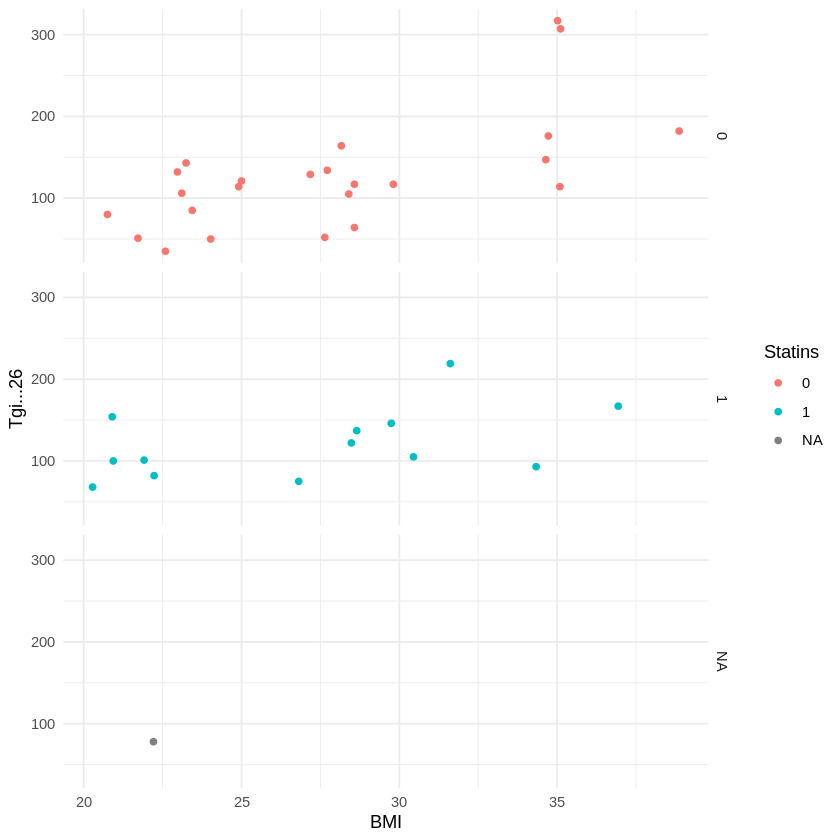

In [ ]:
ggplot(meta, aes(BMI, Tgi...26, colour = Statins)) +
  geom_point() +
  facet_grid(rows = vars(meta$Statins)) +
  theme_minimal()

###*Регрессия*

Можно проверить модель полиномиальной регрессии

$Y = β _0 + β _1 X^1 + β _2 X ^2 + … + β _h X ^h + ε$

с помощью формулы

```model = lm(ЗП ~ poly(НП, degree), data = data)```

Но здесь можно задавть степень - целое число, и библиотека просчитает уровнение до заданной степени.

Однако из scatter-plot видно, что здесь не получится больше степени 1, однако интересно посмотреть степень 1/2, 1 и их комбинацию

$Y = β _0 + β _1 X^1 + β _2 X ^{0.5}$

####Построение моделей и проверка их с помощью кроссвалидации

In [ ]:
# Выбор интересующих параметров (с учетом отсутствия приема статинов, влияющих на уровни липидов), удаление NA,
subset <- meta[meta$Statins == 0,] %>%
  select(c('BMI', 'Tgi...26')) %>%
  drop_na()

In [ ]:
# перемешать интересующие данные
df.shuffled <- subset[sample(nrow(subset)),]

# определить количество k-fold cross-validation
# от 5 до 10 - было показано, что это количество кратностей обеспечивает оптимальный баланс
# между смещением и дисперсией и, таким образом, обеспечивает надежные оценки тестовой MSE
K <- 10


# создание k равноразмерных фолдов
folds <- cut(seq(1, nrow(df.shuffled)), breaks=K, labels= FALSE)
# 1,1,1,2,2,3,3,4,4,4,5,5,6,6,7,7,7,8,8,9,9,10,10,10

# матрица, куда записать результаты MSE's
mse = matrix(data = NA, nrow = K, ncol = 3)

#  K-fold cross validation
for (i in 1:K){

 # определить тренировочный и тестовый датасет
 testIndexes <- which(folds==i, arr.ind= TRUE)
 testData <- df.shuffled[testIndexes, ]
 trainData <- df.shuffled[-testIndexes, ]

 # тренировка и оценка модели
 fit.train = lm(Tgi...26 ~ BMI + sqrt(BMI), data=trainData)
 fit.test = predict(fit.train, newdata=testData)
 mse[i,1] = mean((fit.test-testData$BMI)^2)

}
for (i in 1:K){

 testIndexes <- which (folds==i,arr.ind= TRUE )
 testData <- df.shuffled[testIndexes, ]
 trainData <- df.shuffled[-testIndexes, ]

 fit.train = lm(Tgi...26 ~ BMI, data=trainData)
 fit.test = predict(fit.train, newdata=testData)
 mse[i,2] = mean((fit.test-testData$BMI)^2)

}
for (i in 1:K){

 testIndexes <- which (folds==i,arr.ind= TRUE )
 testData <- df.shuffled[testIndexes, ]
 trainData <- df.shuffled[-testIndexes, ]

 fit.train = lm(Tgi...26 ~ sqrt(BMI), data=trainData)
 fit.test = predict(fit.train, newdata=testData)
 mse[i,3] = mean((fit.test-testData$BMI)^2)

}

#find MSE for each degree
data.frame(degree = c('1+0.5', '1', '0.5'),
            RMSE = sqrt(colMeans(mse)))

degree,RMSE
<chr>,<dbl>
1+0.5,106.9843
1,104.6612
0.5,104.4809


>Как видим по RMSE модели равнозначны

#### Построение модели и оценка с помощью библиотеки "caret"

https://rdrr.io/cran/caret/

In [ ]:
#specify the cross-validation method
ctrl <- trainControl(method = "cv")
#по умолчанию 10 фолдов
#можно выбрать  LOOCV, bootstrap и другие

In [ ]:
#fit a regression model and use CV to evaluate performance
#без trControl будет по умолчанию Resampling: Bootstrapped
model1_0.5 <- train(Tgi...26 ~ BMI + sqrt(BMI), data = subset, method = "lm", trControl = ctrl)
print(model1_0.5)
summary(model1_0.5$finalModel)
print('***********************************')
model1 <- train(Tgi...26 ~ BMI, data = subset, method = "lm", trControl = ctrl)
print(model1)
summary(model1$finalModel)
print('***********************************')
model0.5 <- train(Tgi...26 ~ sqrt(BMI), data = subset, method = "lm", trControl = ctrl)
print(model0.5)
summary(model0.5$finalModel)

Linear Regression 

24 samples
 1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 21, 21, 22, 22, 22, 22, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  53.79364  0.8276588  46.45162

Tuning parameter 'intercept' was held constant at a value of TRUE



Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-77.678 -40.146  -5.976  20.682 126.120 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   647.06    1556.91   0.416    0.682
BMI            35.67      54.31   0.657    0.519
`sqrt(BMI)`  -288.15     583.45  -0.494    0.627

Residual standard error: 54.57 on 21 degrees of freedom
Multiple R-squared:  0.438,	Adjusted R-squared:  0.3844 
F-statistic: 8.182 on 2 and 21 DF,  p-value: 0.002358


[1] "***********************************"
Linear Regression 

24 samples
 1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 21, 22, 21, 22, 22, 21, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  51.97255  0.8176233  44.24445

Tuning parameter 'intercept' was held constant at a value of TRUE



Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-75.859 -39.527  -6.088  21.020 127.765 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -121.223     61.671  -1.966 0.062086 .  
BMI            8.866      2.170   4.086 0.000489 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 53.62 on 22 degrees of freedom
Multiple R-squared:  0.4314,	Adjusted R-squared:  0.4056 
F-statistic: 16.69 on 1 and 22 DF,  p-value: 0.0004893


[1] "***********************************"
Linear Regression 

24 samples
 1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 22, 21, 22, 22, 21, 22, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  51.70159  0.8356929  47.56858

Tuning parameter 'intercept' was held constant at a value of TRUE



Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-74.841 -36.770  -5.634  21.230 128.722 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -372.04     123.82  -3.005 0.006525 ** 
`sqrt(BMI)`    94.69      23.41   4.044 0.000542 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 53.86 on 22 degrees of freedom
Multiple R-squared:  0.4264,	Adjusted R-squared:  0.4003 
F-statistic: 16.36 on 1 and 22 DF,  p-value: 0.0005415


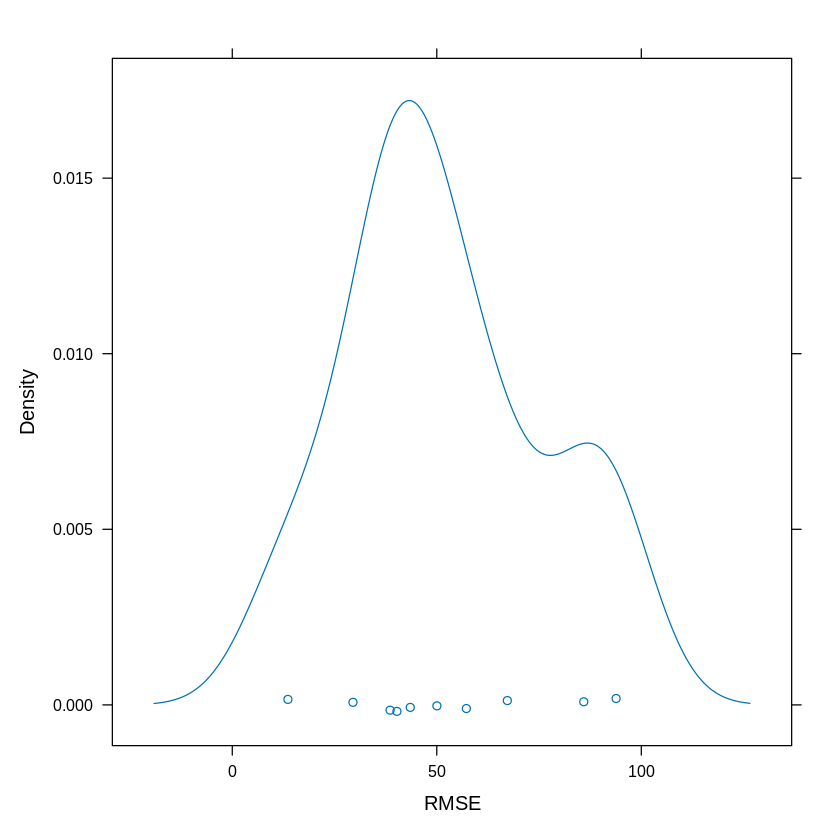

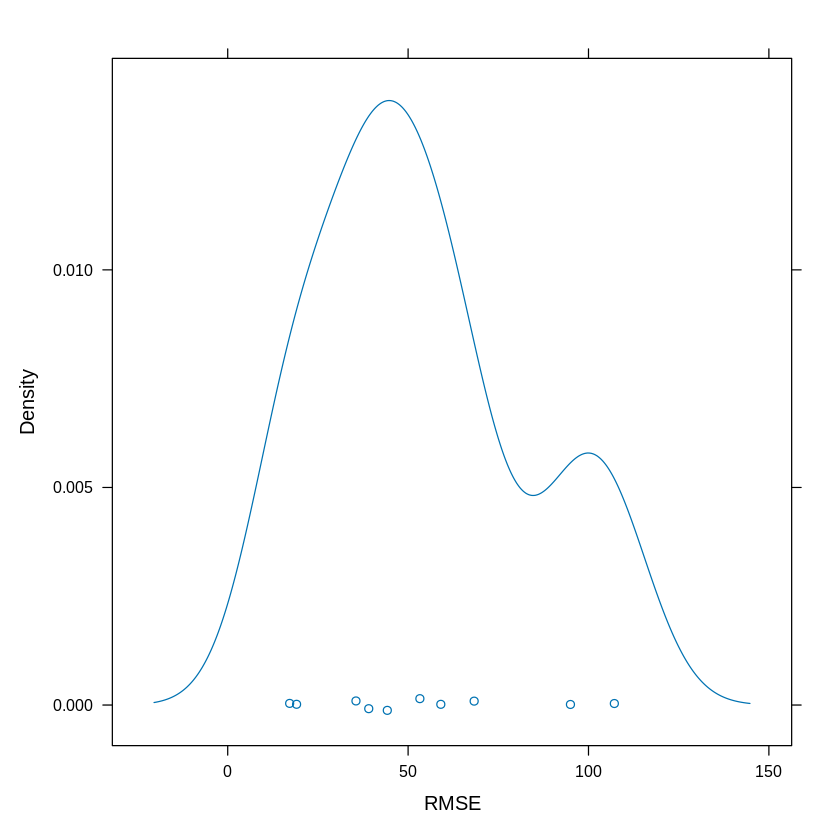

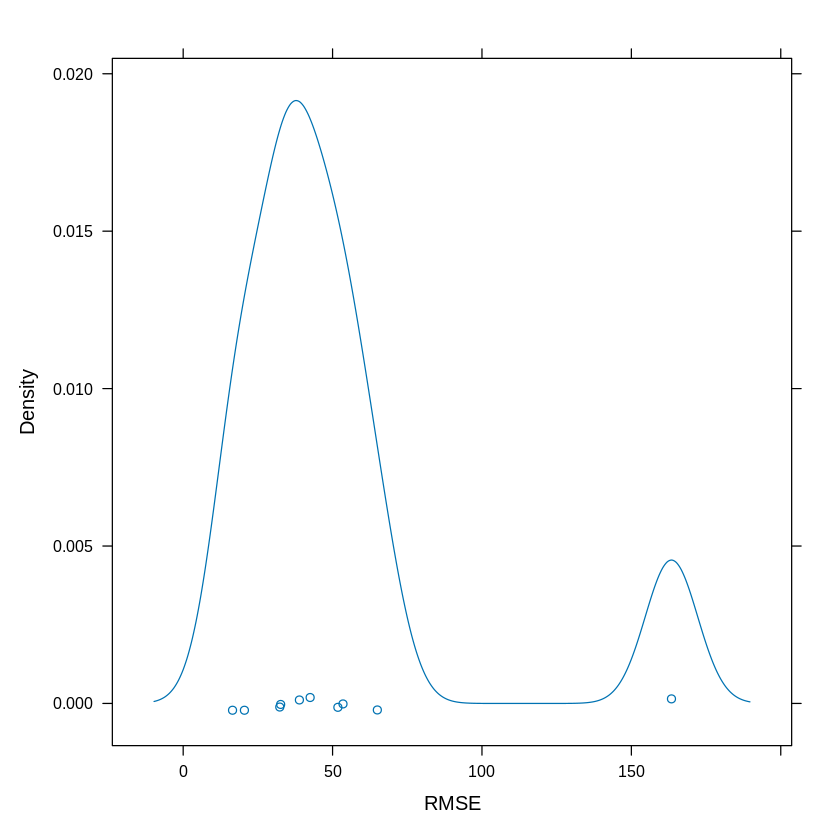

In [ ]:
densityplot(model1)
densityplot(model1_0.5)
densityplot(model0.5)

>Удивительно, но с использованием этой библиотеки при использовании той же кросс-валидации RMSE в 2 раза ниже. Может я что-то и не учел.

Хорошие показатели у линейной модели и с использованием квадратного корня из НП.

####Построение окончательной модели и ее изучение
Хоть надо и выбирать попроще (простую линейную), но интереснее посмотреть следущее

In [ ]:
model = lm(Tgi...26 ~ sqrt(BMI), data=subset)

summary(model)


Call:
lm(formula = Tgi...26 ~ sqrt(BMI), data = subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-74.841 -36.770  -5.634  21.230 128.722 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -372.04     123.82  -3.005 0.006525 ** 
sqrt(BMI)      94.69      23.41   4.044 0.000542 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 53.86 on 22 degrees of freedom
Multiple R-squared:  0.4264,	Adjusted R-squared:  0.4003 
F-statistic: 16.36 on 1 and 22 DF,  p-value: 0.0005415


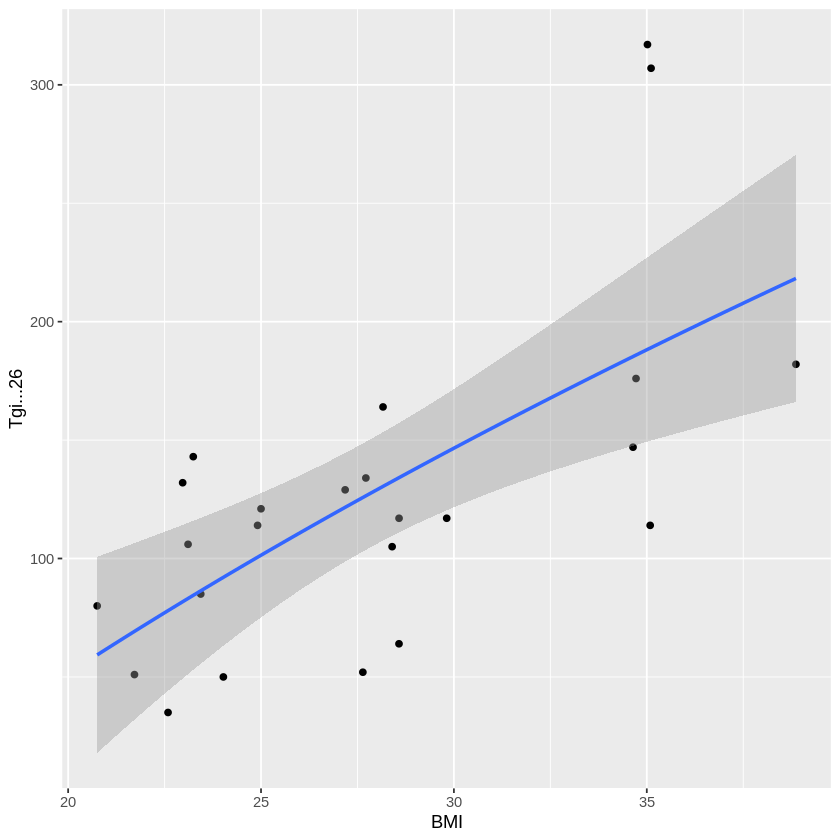

In [ ]:
ggplot(subset, aes (x=BMI, y=Tgi...26)) +
 geom_point() +
 stat_smooth(method='lm', formula = y ~ sqrt(x), linewidth = 1)

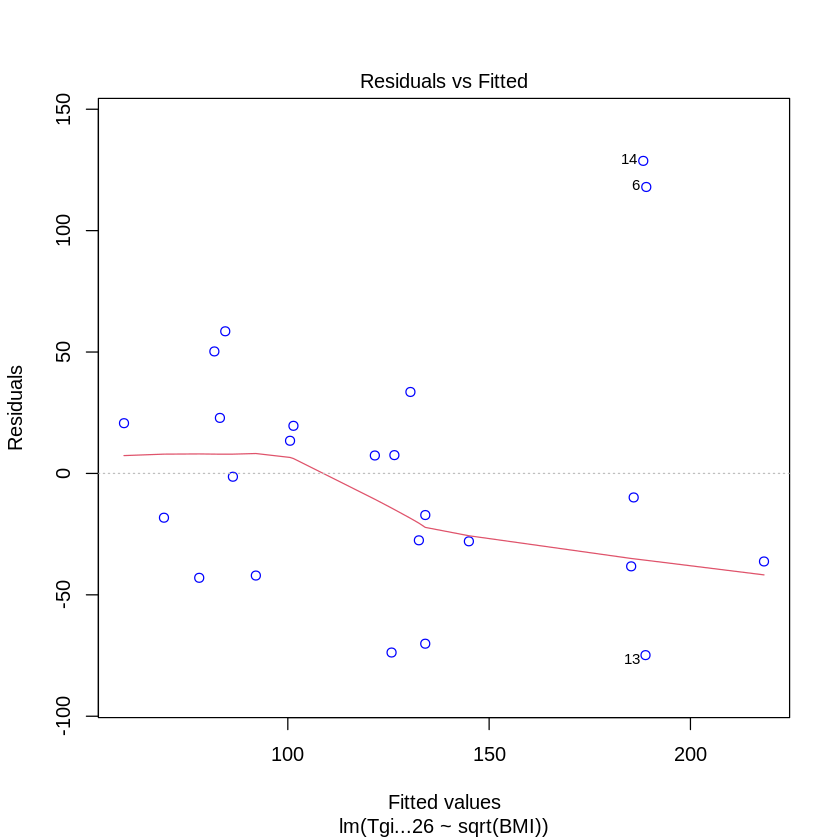

In [ ]:
plot(model, which=1, col=c("blue"))
#plot(model$fitted, model$residuals, xlab="Fitted Value", ylab="Residual")

График представляет собой график остатков по сравнению с подобранными значениями, и показывает наличие нелинейных закономерностей. Для правильной линейной регрессии данные должны быть линейными, чтобы можно было проверить, выполняется ли это условие.
> Мы видим, что данные не имеют какой-либо очевидной четкой закономерности. Хотя он немного изогнут, на нем равномерно распределены остатки по горизонтальной линии без четкого рисунка. Вероятно образцы 14, 6, 13 смещают

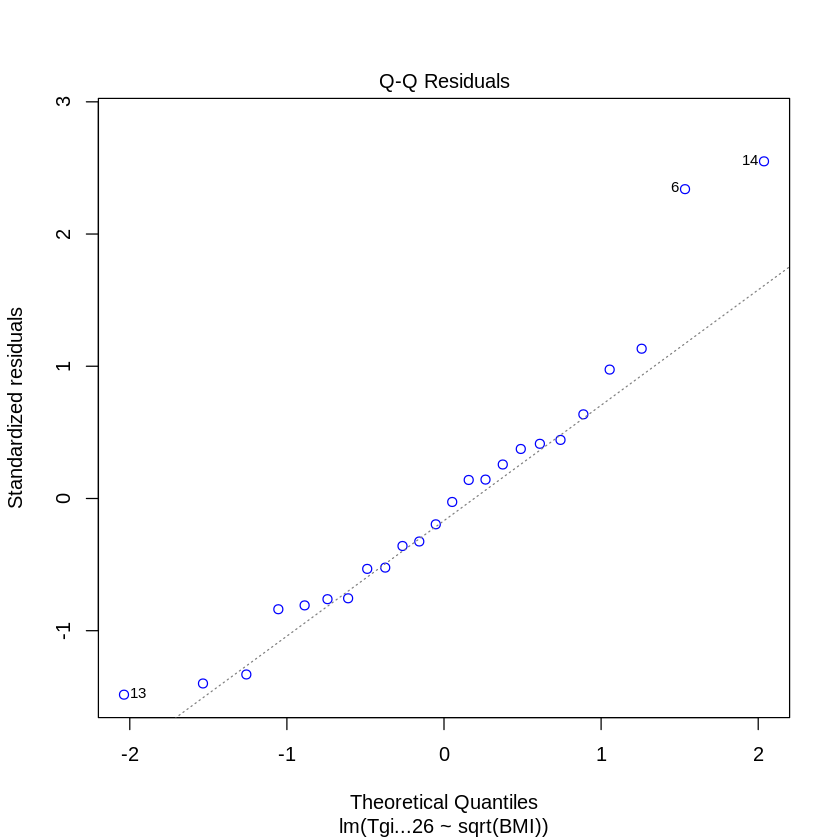

In [ ]:
plot(model, which=2, col=c("blue"))

Остатки должны быть нормально распределены, и график Q-Q покажет это. Если остатки на этом графике проходят близко к прямой линии, это хороший признак того, что они нормально распределены.
> Для нашей модели график Q-Q показывает довольно хорошее выравнивание по линии с небольшим смещением нескольких точек вверху (14, 6)

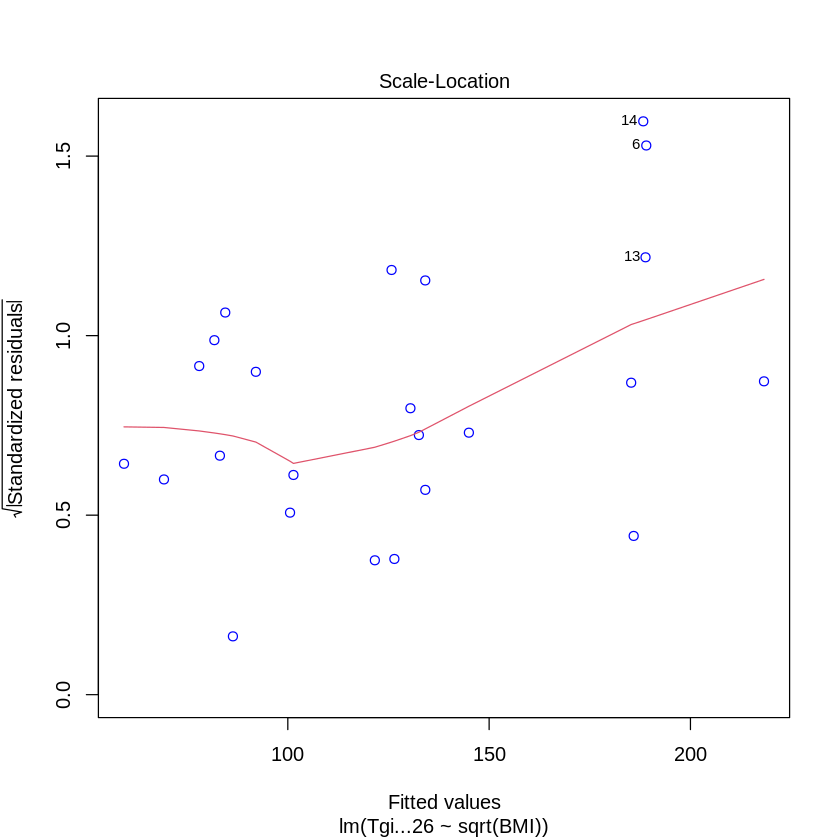

In [ ]:
plot(model, which=3, col=c("blue"))

Этот график проверяет предположение линейной регрессии о равной дисперсии (гомоскедастичности), то есть о том, что остатки имеют одинаковую дисперсию вдоль линии регрессии. Его также называют графиком Spread-Location.
> Все те же 14, 6, 13 смещают

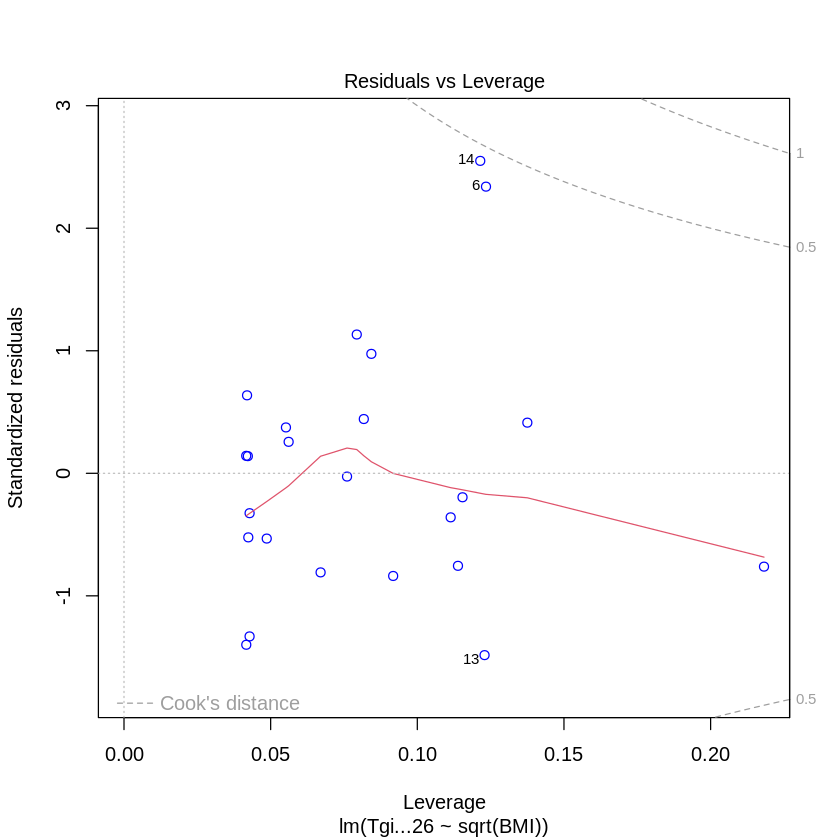

In [ ]:
plot(model, which=5, col=c("blue"))

Этот график можно использовать для поиска важных случаев в наборе данных. Важный случай - это случай, который, если его удалить, повлияет на модель, поэтому следует рассмотреть вопрос о его включении или исключении.

Важный случай может быть или не быть выбросом, и цель этой диаграммы - выявить случаи, которые имеют большое влияние на модель.

> В нашем случае всё те же 14, 6 и 13

####Variance Inflation Factors
Здесь же мне интересно изучить и задачу множественной регрессии и мультиколлинеарности

использование *car* library

In [ ]:
subset <- meta[meta$Statins == 0,] %>%
  select(c('BMI', 'Tgi...26', 'Wt', 'Ht', 'AI')) %>%
  drop_na()
model <- lm(Tgi...26 ~ BMI + Wt + Ht + AI, data = subset)
summary(model)


Call:
lm(formula = Tgi...26 ~ BMI + Wt + Ht + AI, data = subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-77.919 -36.342  -0.178  19.655 146.943 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -580.508   2360.995  -0.246    0.808
BMI           22.550     36.904   0.611    0.548
Wt            -4.990     13.627  -0.366    0.718
Ht             2.662     14.351   0.186    0.855
AI             5.869     13.541   0.433    0.670

Residual standard error: 55.06 on 19 degrees of freedom
Multiple R-squared:  0.4824,	Adjusted R-squared:  0.3734 
F-statistic: 4.427 on 4 and 19 DF,  p-value: 0.01071


In [ ]:
vif_values <- vif(model)
vif_values

BMI         Wt         Ht         AI 
274.386358 356.866235  57.475855   1.076903

>Значение VIF начинается с 1 и не имеет верхнего предела. Общее эмпирическое правило для интерпретации VIF выглядит следующим образом:

* Значение 1 указывает на отсутствие корреляции между данной переменной-предиктором и любыми другими переменными-предикторами в модели.
* Значение от 1 до 5 указывает на умеренную корреляцию между данной переменной-предиктором и другими переменными-предикторами в модели, но часто она недостаточно серьезная, чтобы требовать внимания.
* Значение больше 5 указывает на потенциально сильную корреляцию между данной переменной-предиктором и другими переменными-предикторами в модели. В этом случае оценки коэффициентов и p-значения в выходных данных регрессии, вероятно, ненадежны.

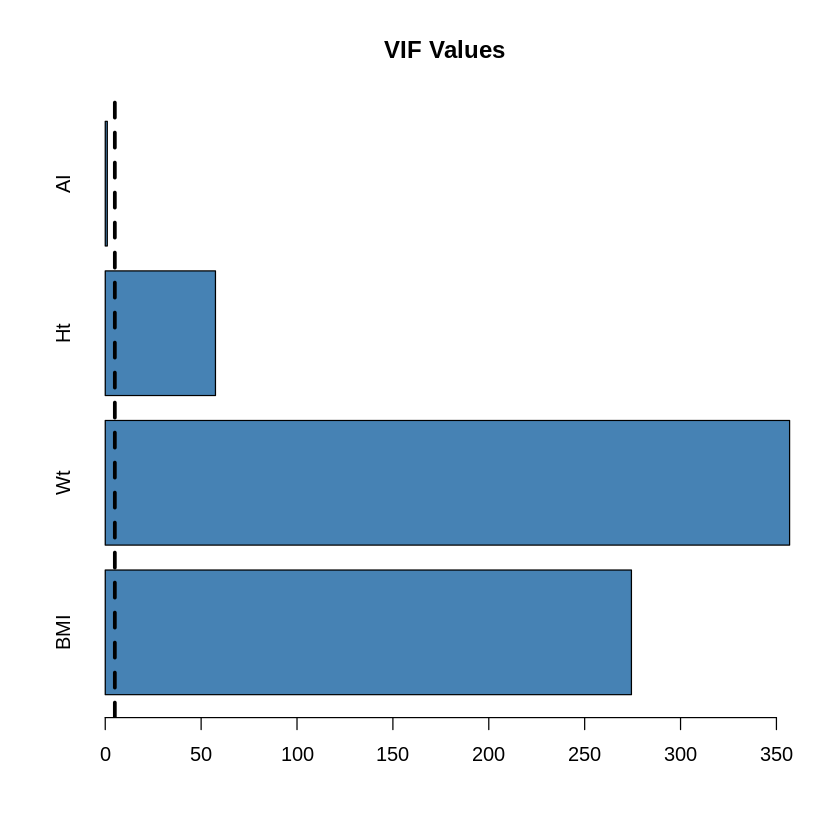

In [ ]:
barplot(vif_values, main = "VIF Values", horiz = TRUE, col = "steelblue")
abline(v = 5, lwd = 3, lty = 2)

Мы уже знаем, что ИМТ прямопропорционален весу (что мы и видим в полученном), и так как вес имеет наибольший VIF, то его следует исключать из модели в первую очередь

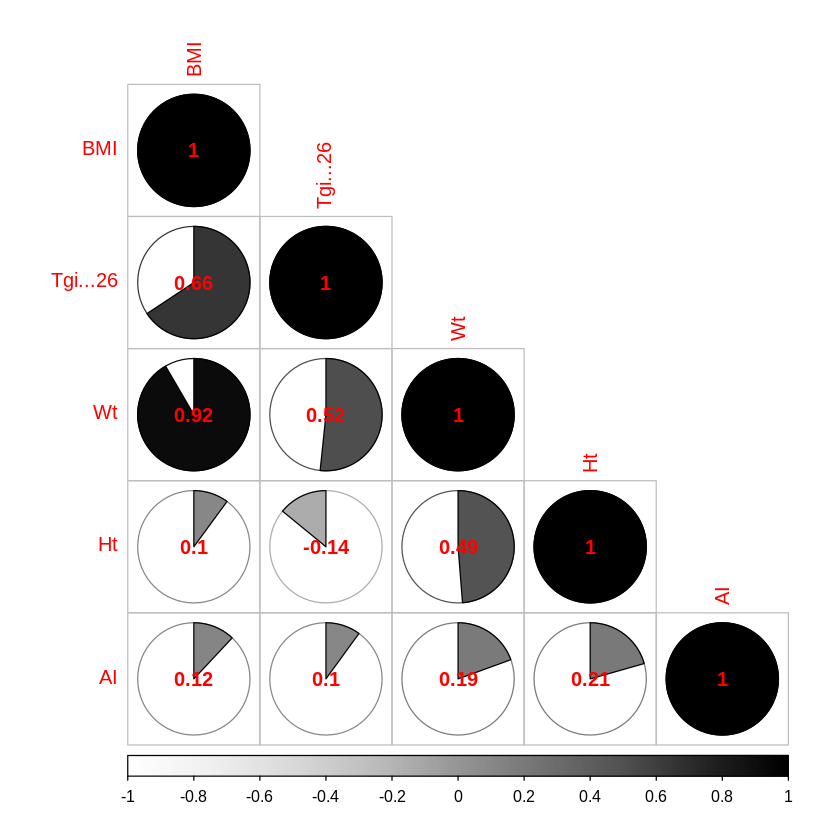

In [ ]:
corrplot(cor(subset), method = "pie",  col = COL1('Greys'), type = "lower", addCoef.col = 'red') #library(corrplot)

##Задача 2

> Обратная предыдущей задача. Можно ли, зная уровень триглицеридов, предположить комплекцию человека (степень ожирения)

###Создание тестовых данных с помощью bootstrap

In [ ]:
subset <- meta[meta$Statins == 0,] %>%
  select(c('Tgi...26', 'obesity')) %>%
  rename(Tgi = Tgi...26) %>%
  drop_na()

In [ ]:
#library(resample)
temp0 <- bootstrap(data = subset[subset$obesity == 0,]$Tgi, statistic = mean, R = 100)
temp1 <- bootstrap(data = subset[subset$obesity == 1,]$Tgi, statistic = mean, R = 100)
temp2 <- bootstrap(data = subset[subset$obesity == 2,]$Tgi, statistic = mean, R = 100)
temp3 <- bootstrap(data = subset[subset$obesity == 3,]$Tgi, statistic = mean, R = 100)

In [ ]:
train_subset <- rbind(data.frame(obesity = 0, Tgi = temp0$replicates) %>% rename(Tgi = mean),
      data.frame(obesity = 1, Tgi = temp1$replicates) %>% rename(Tgi = mean),
      data.frame(obesity = 2, Tgi = temp2$replicates) %>% rename(Tgi = mean),
      data.frame(obesity = 3, Tgi = temp3$replicates) %>% rename(Tgi = mean)) %>%
        mutate(obesity = as.factor(obesity)) %>%
        as_tibble()

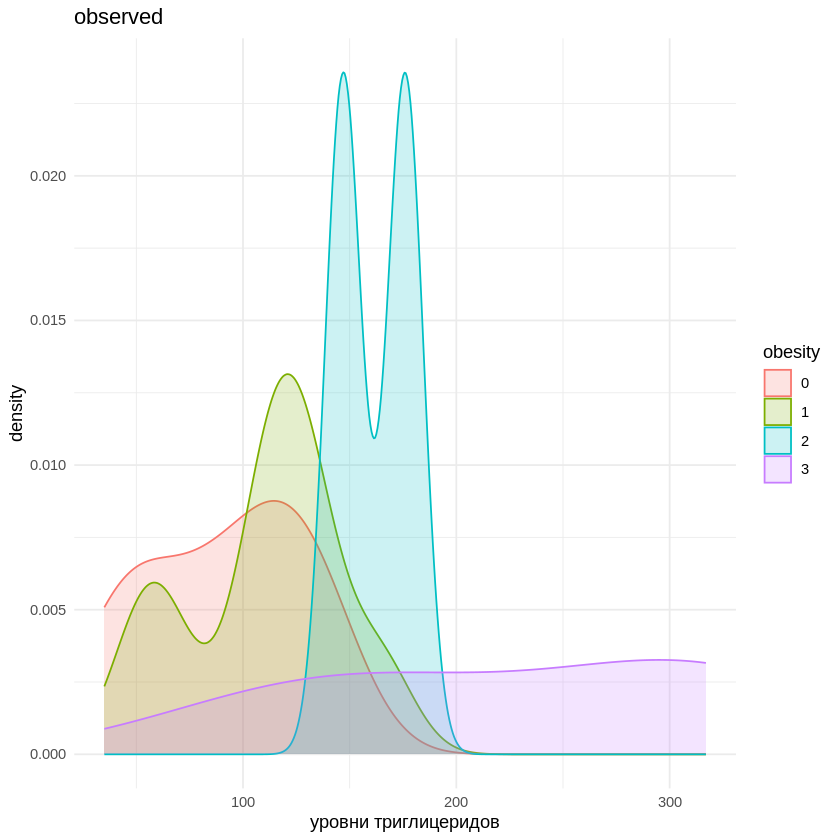

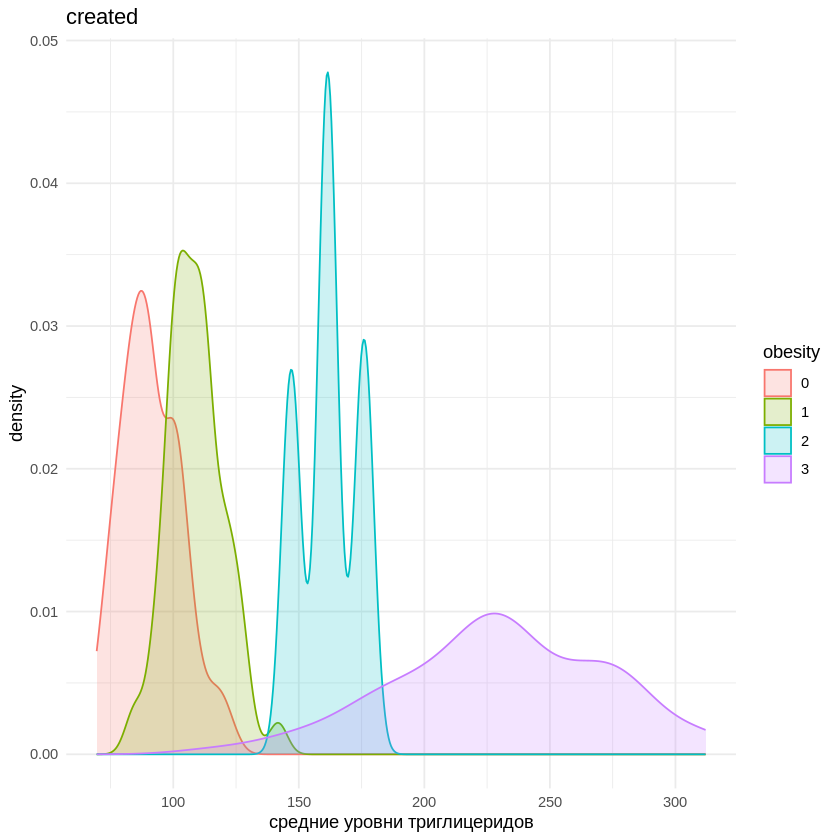

In [ ]:
ggplot(subset ,aes(x = Tgi, col = obesity, fill = obesity, group = obesity)) + geom_density(alpha=0.2) +
  labs(title = "observed", x = "уровни триглицеридов") +
  theme_minimal()
ggplot(train_subset ,aes(x = Tgi, col = obesity, fill = obesity, group = obesity)) + geom_density(alpha=0.2) +
  labs(title = "created", x = "средние уровни триглицеридов") +
  theme_minimal()

###Построение модели

In [ ]:
model <- multinom(obesity ~ Tgi, train_subset) #library(nnet)

# weights:  12 (6 variable)
initial  value 554.517744 
iter  10 value 209.141645
iter  20 value 163.514335
iter  30 value 162.343285
iter  40 value 162.341636
iter  40 value 162.341636
final  value 162.341636 
converged


In [ ]:
pred_class <- predict(model, subset) #предсказание класса
pred_prob <- predict(model, subset, "probs") #предсказание вероятностей классов

In [ ]:
temp <- confusionMatrix(pred_class, subset$obesity, mode = "everything")
temp

Confusion Matrix and Statistics

          Reference
Prediction 0 1 2 3
         0 5 2 0 0
         1 4 5 0 1
         2 1 1 2 1
         3 0 0 0 2

Overall Statistics
                                          
               Accuracy : 0.5833          
                 95% CI : (0.3664, 0.7789)
    No Information Rate : 0.4167          
    P-Value [Acc > NIR] : 0.07463         
                                          
                  Kappa : 0.4118          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3
Sensitivity            0.5000   0.6250  1.00000  0.50000
Specificity            0.8571   0.6875  0.86364  1.00000
Pos Pred Value         0.7143   0.5000  0.40000  1.00000
Neg Pred Value         0.7059   0.7857  1.00000  0.90909
Precision              0.7143   0.5000  0.40000  1.00000
Recall                 0.5000   0.6250  1.00000  0.50000
F1                     

F1-метрика чуть перевалила за 0,5. Но есть дисбаланс классов

In [ ]:
#далее создаю ROC-кривые для каждого класса
#для этого объединить вероятности с dummy-таблицей истинных классов
# код взят https://plotly.com/r/roc-and-pr-curves/
colnames(pred_prob) <- c("pred_0", "pred_1", "pred_2", "pred_3")

y_onehot <- dummy_cols(subset$obesity)
colnames(y_onehot) <- c('drop', "r_0", "r_1", "r_2", "r_3")
y_onehot <- subset(y_onehot, select = -c(drop)) %>% mutate_if(is.numeric, as.factor)

z = cbind(pred_prob, y_onehot)

In [ ]:
roc_0 <- roc_curve(data = z, r_0, pred_0) #library (yardstick)
roc_0$specificity <- 1 - roc_0$specificity
colnames(roc_0) <- c('threshold', 'tpr', 'fpr')
auc_0 <- roc_auc(data = z, r_0, pred_0)
auc_0 <- auc_0$.estimate
obesity_0 <- paste('obesity_0 (AUC=',toString(round(1-auc_0, 2)),')',sep = '')

In [ ]:
roc_1 <- roc_curve(data = z, r_1, pred_1)
roc_1$specificity <- 1 - roc_1$specificity
colnames(roc_1) <- c('threshold', 'tpr', 'fpr')
auc_1 <- roc_auc(data = z, r_1, pred_1)
auc_1 <- auc_1$.estimate
obesity_1 <- paste('obesity_1 (AUC=',toString(round(1-auc_1, 2)),')',sep = '')

In [ ]:
roc_2 <- roc_curve(data = z, r_2, pred_2)
roc_2$specificity <- 1 - roc_2$specificity
colnames(roc_2) <- c('threshold', 'tpr', 'fpr')
auc_2 <- roc_auc(data = z, r_2, pred_2)
auc_2 <- auc_2$.estimate
obesity_2 <- paste('obesity_2 (AUC=',toString(round(1-auc_2, 2)),')',sep = '')

In [ ]:
roc_3 <- roc_curve(data = z, r_3, pred_3)
roc_3$specificity <- 1 - roc_3$specificity
colnames(roc_3) <- c('threshold', 'tpr', 'fpr')
auc_3 <- roc_auc(data = z, r_3, pred_3)
auc_3 <- auc_3$.estimate
obesity_3 <- paste('obesity_3 (AUC=',toString(round(1-auc_3, 2)),')',sep = '')

In [ ]:
#plotly не хочет отображаться в colab
fig <- plot_ly() %>%
  add_segments(x = 0, xend = 1, y = 0, yend = 1, line = list(dash = "dash", color = 'black'), showlegend = FALSE) %>%
  add_trace(data = roc_0, x = ~fpr, y = ~tpr, mode = 'lines', name = obesity_0, type = 'scatter') %>%
  add_trace(data = roc_1, x = ~fpr, y = ~tpr, mode = 'lines', name = obesity_1, type = 'scatter') %>%
  add_trace(data = roc_2, x = ~fpr, y = ~tpr, mode = 'lines', name = obesity_2, type = 'scatter') %>%
  add_trace(data = roc_3, x = ~fpr, y = ~tpr, mode = 'lines', name = obesity_3, type = 'scatter') %>%
  layout(xaxis = list(
    title = "False Positive Rate"
  ), yaxis = list(
    title = "True Positive Rate"
  ),legend = list(x = 100, y = 0.5))
fig

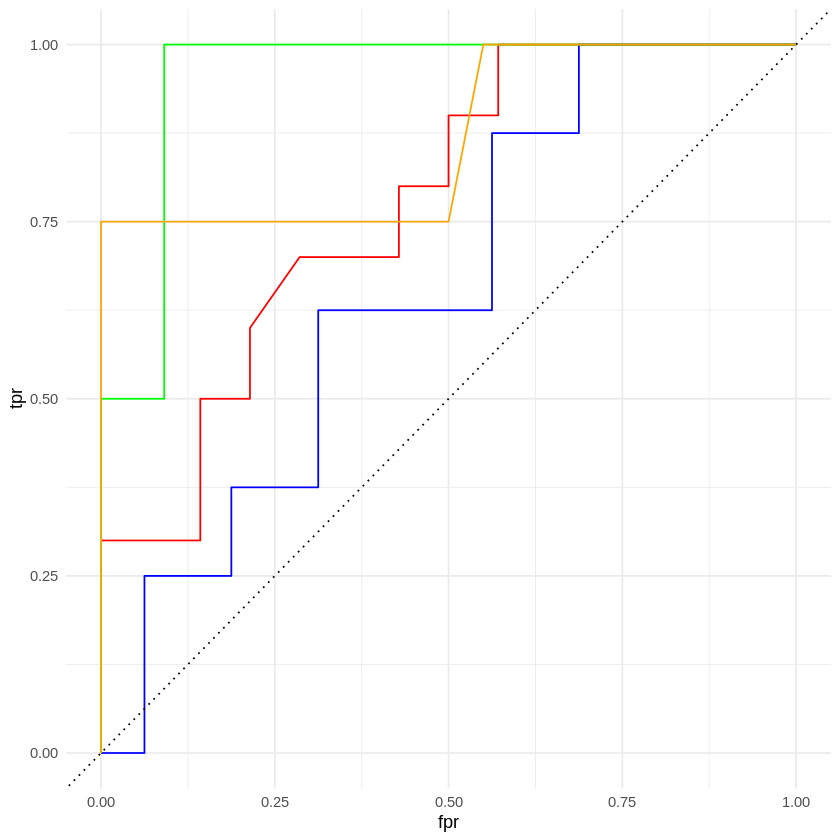

In [ ]:
ggplot() +
  geom_path(data = roc_0, aes(x = fpr, y = tpr), colour = "red") +
  geom_path(data = roc_1, aes(x = fpr, y = tpr), colour = "blue") +
  geom_path(data = roc_2, aes(x = fpr, y = tpr), colour = "green") +
  geom_path(data = roc_3, aes(x = fpr, y = tpr), colour = "orange") +
  geom_abline(lty = 3) +
  theme_minimal()

In [ ]:
colnames(pred_prob) <- c(0, 1, 2, 3)
temp <- multiclass.roc(subset$obesity, pred_prob)

In [ ]:
temp


Call:
multiclass.roc.default(response = subset$obesity, predictor = pred_prob)

Data: multivariate predictor pred_prob with 4 levels of subset$obesity: 0, 1, 2, 3.
Multi-class area under the curve: 0.8453

Хуже всего предсказание работает для людей с небольшим ожирением

##Задача3

До этого исключал прием статинов из обучения. Здесь хочу посмотреть, есть ли влияние приема статинов на уровень триглицеридов в зависимости от уровня ожирения

In [ ]:
subset <- meta %>%
  select(c('obesity', 'Tgi...26', 'Statins')) %>%
  rename(Tgi = Tgi...26) %>%
  drop_na()

In [ ]:
temp0_0 <- bootstrap(data = subset[subset$obesity == 0 & subset$Statins == 0,]$Tgi, statistic = mean, R = 50)
temp1_0 <- bootstrap(data = subset[subset$obesity == 1 & subset$Statins == 0,]$Tgi, statistic = mean, R = 50)
temp2_0 <- bootstrap(data = subset[subset$obesity == 2 & subset$Statins == 0,]$Tgi, statistic = mean, R = 50)
temp3_0 <- bootstrap(data = subset[subset$obesity == 3 & subset$Statins == 0,]$Tgi, statistic = mean, R = 50)
temp0_1 <- bootstrap(data = subset[subset$obesity == 0 & subset$Statins == 1,]$Tgi, statistic = mean, R = 50)
temp1_1 <- bootstrap(data = subset[subset$obesity == 1 & subset$Statins == 1,]$Tgi, statistic = mean, R = 50)
temp2_1 <- bootstrap(data = subset[subset$obesity == 2 & subset$Statins == 1,]$Tgi, statistic = mean, R = 50)
temp3_1 <- bootstrap(data = subset[subset$obesity == 3 & subset$Statins == 1,]$Tgi, statistic = mean, R = 50)

In [ ]:
train_subset <- rbind(data.frame(obesity = 0, Statins = 0, Tgi = temp0_0$replicates) %>% rename(Tgi = mean),
      data.frame(obesity = 1, Statins = 0, Tgi = temp1_0$replicates) %>% rename(Tgi = mean),
      data.frame(obesity = 2, Statins = 0, Tgi = temp2_0$replicates) %>% rename(Tgi = mean),
      data.frame(obesity = 3, Statins = 0, Tgi = temp3_0$replicates) %>% rename(Tgi = mean),
      data.frame(obesity = 0, Statins = 1, Tgi = temp0_1$replicates) %>% rename(Tgi = mean),
      data.frame(obesity = 1, Statins = 1, Tgi = temp1_1$replicates) %>% rename(Tgi = mean),
      data.frame(obesity = 2, Statins = 1, Tgi = temp2_1$replicates) %>% rename(Tgi = mean),
      data.frame(obesity = 3, Statins = 1, Tgi = temp3_1$replicates) %>% rename(Tgi = mean)) %>%
        mutate(obesity = as.factor(obesity),
                Statins = as.factor(Statins)) %>%
        as_tibble()

In [ ]:
lme1 <- lmer(Tgi ~ obesity + (1 | Statins), train_subset)
lme2 <- lmer(Tgi ~ obesity + (obesity | Statins), train_subset)

boundary (singular) fit: see help('isSingular')



In [ ]:
lm0 <- lm(Tgi ~ obesity + Statins, train_subset)

In [ ]:
lm <- lm(Tgi ~ obesity, train_subset)

In [ ]:
lm0.1 <- lm(Tgi ~ Statins, train_subset)

In [ ]:
summary(lm)
print("***********************************")
summary(lm0.1)
print("***********************************")
summary(lm0)
print("***********************************")
summary(lme1)
print("***********************************")
summary(lme2)


Call:
lm(formula = Tgi ~ obesity, data = train_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-72.325 -15.470  -1.995  11.030 108.675 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   96.538      2.904   33.24  < 2e-16 ***
obesity1      18.563      4.107    4.52 8.17e-06 ***
obesity2      53.932      4.107   13.13  < 2e-16 ***
obesity3     106.787      4.107   26.00  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.04 on 396 degrees of freedom
Multiple R-squared:  0.6648,	Adjusted R-squared:  0.6622 
F-statistic: 261.7 on 3 and 396 DF,  p-value: < 2.2e-16


[1] "***********************************"



Call:
lm(formula = Tgi ~ Statins, data = train_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-83.376 -38.230  -3.476  34.758 161.524 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  150.476      3.478  43.267  < 2e-16 ***
Statins1     -18.234      4.918  -3.707 0.000239 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 49.18 on 398 degrees of freedom
Multiple R-squared:  0.03338,	Adjusted R-squared:  0.03095 
F-statistic: 13.74 on 1 and 398 DF,  p-value: 0.0002392


[1] "***********************************"



Call:
lm(formula = Tgi ~ obesity + Statins, data = train_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-81.442 -21.371  -2.604  15.676  99.558 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  105.655      3.085  34.252  < 2e-16 ***
obesity1      18.563      3.902   4.758 2.75e-06 ***
obesity2      53.932      3.902  13.822  < 2e-16 ***
obesity3     106.787      3.902  27.369  < 2e-16 ***
Statins1     -18.234      2.759  -6.609 1.26e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.59 on 395 degrees of freedom
Multiple R-squared:  0.6981,	Adjusted R-squared:  0.6951 
F-statistic: 228.4 on 4 and 395 DF,  p-value: < 2.2e-16


[1] "***********************************"


Linear mixed model fit by REML ['lmerMod']
Formula: Tgi ~ obesity + (1 | Statins)
   Data: train_subset

REML criterion at convergence: 3773.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9443 -0.7670 -0.0944  0.5616  3.6161 

Random effects:
 Groups   Name        Variance Std.Dev.
 Statins  (Intercept) 162.5    12.75   
 Residual             761.2    27.59   
Number of obs: 400, groups:  Statins, 2

Fixed effects:
            Estimate Std. Error t value
(Intercept)   96.538      9.426  10.241
obesity1      18.563      3.902   4.758
obesity2      53.932      3.902  13.822
obesity3     106.787      3.902  27.369

Correlation of Fixed Effects:
         (Intr) obsty1 obsty2
obesity1 -0.207              
obesity2 -0.207  0.500       
obesity3 -0.207  0.500  0.500

[1] "***********************************"


Linear mixed model fit by REML ['lmerMod']
Formula: Tgi ~ obesity + (obesity | Statins)
   Data: train_subset

REML criterion at convergence: 3588.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.9828 -0.4055 -0.0054  0.3457  3.5979 

Random effects:
 Groups   Name        Variance Std.Dev. Corr             
 Statins  (Intercept)   34.472  5.871                    
          obesity1       3.967  1.992    1.00            
          obesity2     392.342 19.808   -1.00 -1.00      
          obesity3    3267.522 57.162   -1.00 -1.00  1.00
 Residual              474.430 21.781                    
Number of obs: 400, groups:  Statins, 2

Fixed effects:
            Estimate Std. Error t value
(Intercept)   96.538      4.688  20.591
obesity1      18.563      3.387   5.481
obesity2      53.932     14.341   3.761
obesity3     106.787     40.537   2.634

Correlation of Fixed Effects:
         (Intr) obsty1 obsty2
obesity1  0.069              
obesity2 -0.935 -0.308       
obesity

$ψ^2/(ψ^2 + σ^2)$

Из lme1 $ψ = 12.75, σ = 27.59$

Только 17,6 % дисперсии можно объяснить влиянием Статинов.

In [ ]:
anova(lme1, lme2, lm0, lm, lm0.1)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lm0.1,3,4255.602,4267.577,-2124.801,4249.602,NA,NA,NA
lm,5,3836.030,3855.988,-1913.015,3826.030,423.571897,2,1.053249e-92
lme1,6,3804.265,3828.214,-1896.133,3792.265,33.765143,1,6.218313e-09
lm0,6,3796.078,3820.027,-1892.039,3784.078,8.187582,0,NA
lme2,15,3637.065,3696.937,-1803.532,3607.065,177.012850,9,2.129282e-33


>AIC BIC - используется для сравнения моделей. Как таковое значение не несёт в себе никакой информации, его можно использовать как критерий для отбора модели, который определяет на сколько сильно модель переобучена. Чем меньше значение - тем лучше модель. BIC отличается от AIC тем, что он больше штрафует за дополнительные (и не влияющие ни на что) параметры модели.

**Вывод:**Влияние самого ожирения больше, чем прием статинов на уровень триглицеридов

In [ ]:
subset$predicted_by_lme1 <- predict(lme1, subset)
subset$predicted_by_lme2 <- predict(lme2, subset)

`summarise()` has grouped output by 'obesity', 'Statins'. You can override
using the `.groups` argument.


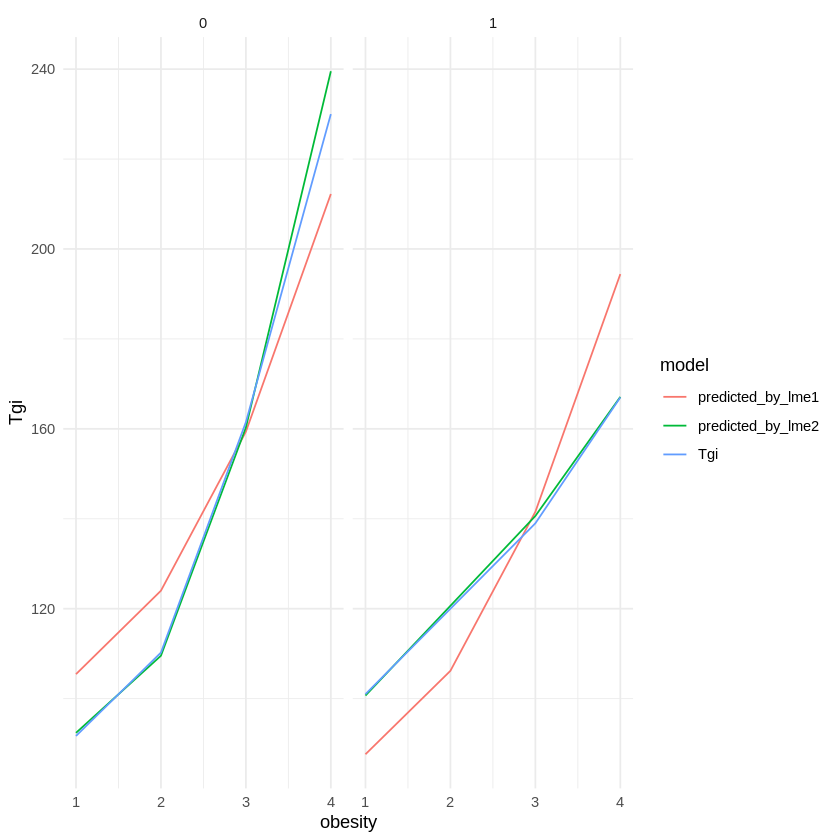

In [ ]:
subset %>%
  pivot_longer(cols = c(Tgi, predicted_by_lme1, predicted_by_lme2), names_to = "model", values_to = "Tgi") %>%
  group_by(obesity, Statins, model) %>%
  summarise(Tgi = mean(Tgi)) %>%
  mutate(obesity = as.numeric(obesity)) %>%
  ggplot(aes(x = obesity, y = Tgi, colour = model)) +
  geom_line() +
  scale_x_continuous(breaks = 0:9) +
  facet_wrap(~Statins) +
  theme_minimal()

> Здесь модели не выглядят линейными, потому как для каждго класса свой коэффициент (степень ожирения внесена в модель как фактор, а не число)

lme2 ближе к истинным значениям

boundary (singular) fit: see help('isSingular')

`summarise()` has grouped output by 'obesity', 'Statins'. You can override
using the `.groups` argument.


Linear mixed model fit by REML ['lmerMod']
Formula: Tgi ~ as.numeric(obesity) + (1 | Statins)
   Data: train_subset

REML criterion at convergence: 3774.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1055 -0.4693 -0.1430  0.4734  4.2710 

Random effects:
 Groups   Name        Variance Std.Dev.
 Statins  (Intercept) 177.6    13.33   
 Residual             738.8    27.18   
Number of obs: 400, groups:  Statins, 2

Fixed effects:
                    Estimate Std. Error t value
(Intercept)           56.985      9.994   5.702
as.numeric(obesity)   33.025      1.216  27.168

Correlation of Fixed Effects:
            (Intr)
as.nmrc(bs) -0.304

Linear mixed model fit by REML ['lmerMod']
Formula: Tgi ~ as.numeric(obesity) + (as.numeric(obesity) | Statins)
   Data: train_subset

REML criterion at convergence: 3654

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4212 -0.4951  0.0815  0.4245  4.1749 

Random effects:
 Groups   Name                Variance Std.Dev. Corr 
 Statins  (Intercept)         925.6    30.42         
          as.numeric(obesity) 307.7    17.54    -1.00
 Residual                     544.0    23.32         
Number of obs: 400, groups:  Statins, 2

Fixed effects:
                    Estimate Std. Error t value
(Intercept)            56.99      21.70   2.626
as.numeric(obesity)    33.02      12.45   2.653

Correlation of Fixed Effects:
            (Intr)
as.nmrc(bs) -0.998
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see help('isSingular')


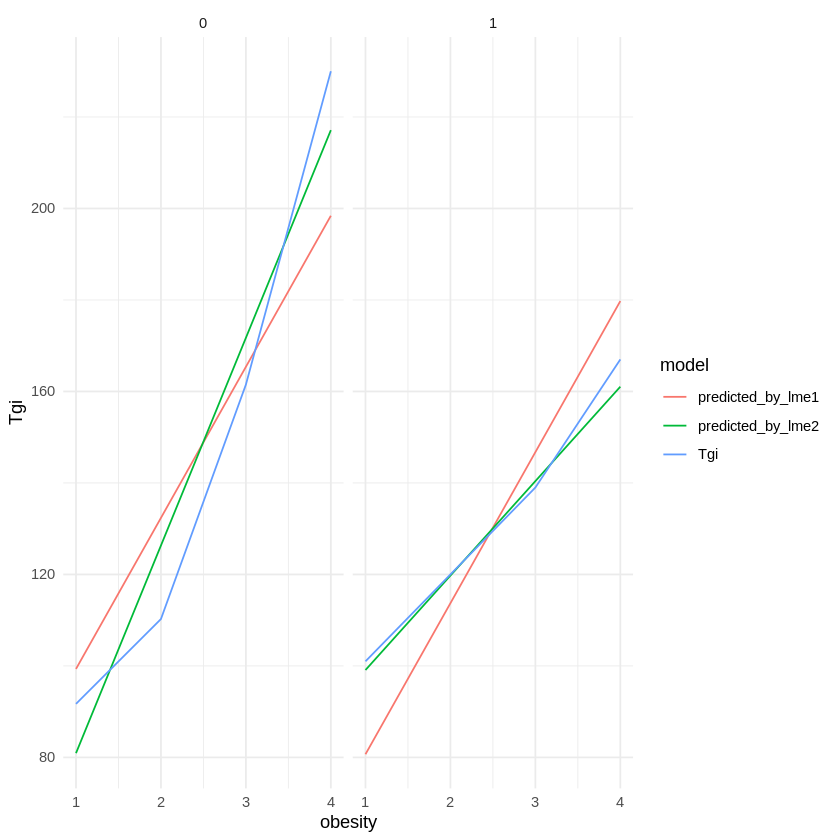

In [ ]:
#здесь степень ожирения как число, можно просто взять индекс массы тела
lme1 <- lmer(Tgi ~ as.numeric(obesity) + (1 | Statins), train_subset)
lme2 <- lmer(Tgi ~ as.numeric(obesity)  + (as.numeric(obesity)  | Statins), train_subset)
subset$predicted_by_lme1 <- predict(lme1, subset)
subset$predicted_by_lme2 <- predict(lme2, subset)
subset %>%
  pivot_longer(cols = c(Tgi, predicted_by_lme1, predicted_by_lme2), names_to = "model", values_to = "Tgi") %>%
  group_by(obesity, Statins, model) %>%
  summarise(Tgi = mean(Tgi)) %>%
  mutate(obesity = as.numeric(obesity)) %>%
  ggplot(aes(x = obesity, y = Tgi, colour = model)) +
  geom_line() +
  scale_x_continuous(breaks = 0:9) +
  facet_wrap(~Statins) +
  theme_minimal()
summary(lme1)
summary(lme2)

здесь t-value ниже и variance больше для коэффициента (Intercept) статинов

Показатели моделей https://habr.com/ru/articles/681218/

Сравнение смешанных эффеков https://www.cantab.net/users/filimon/cursoFCDEF/will/random_intercepts.pdf

##Проба с Пуассоновской регрессией

In [ ]:
new_data <- meta %>%
  mutate(count_d = as.numeric(Dm) + as.numeric(HT) + as.numeric(LVH) + as.numeric(IHD) + as.numeric(MI) + as.numeric(Str))

In [ ]:
new_data$count_d

[1]  7  8 11  6  8  9  7  9  7 10  9  6  8 10  9  9  8  9  6  7  8  7  7  6  7
[26]  6  6  7  6  7  6  7  9  9  6  9 11  7

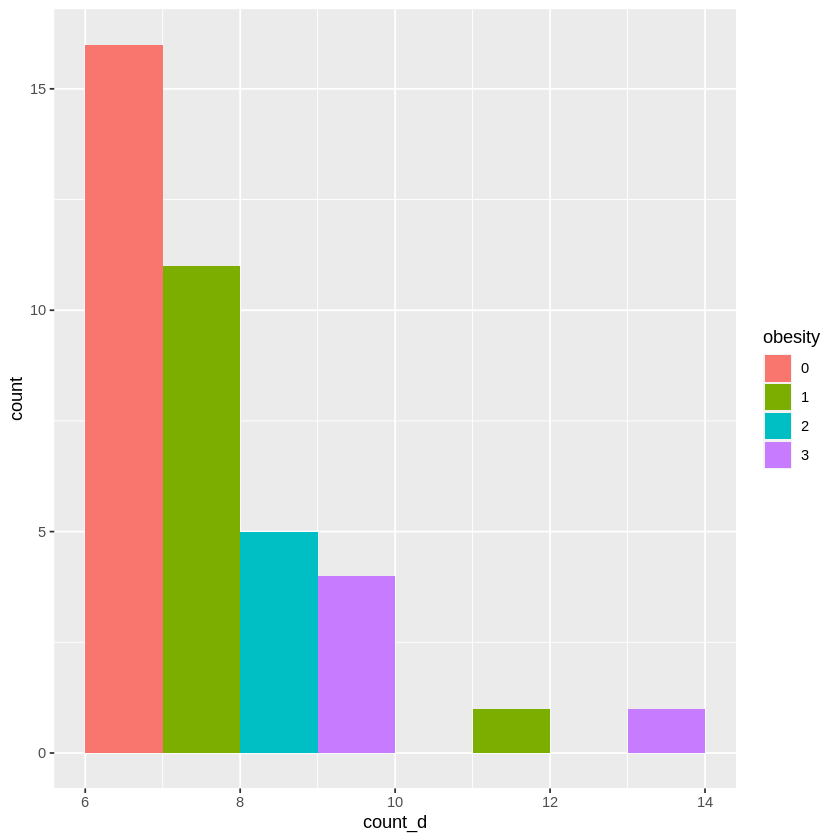

In [ ]:
ggplot(new_data, aes(count_d, fill = obesity)) +
  geom_histogram(binwidth = 4, position = "dodge")

In [ ]:
model <- glm(count_d ~ obesity + Sm, family = "poisson" ,
             data = new_data)


Call:
glm(formula = count_d ~ obesity + Sm, family = "poisson", data = new_data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.98462    0.09683  20.496   <2e-16 ***
obesity1     0.10759    0.13789   0.780    0.435    
obesity2     0.04352    0.18892   0.230    0.818    
obesity3     0.16714    0.18064   0.925    0.355    
Sm1         -0.02936    0.22565  -0.130    0.896    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 10.0524  on 37  degrees of freedom
Residual deviance:  8.8744  on 33  degrees of freedom
AIC: 166.66

Number of Fisher Scoring iterations: 4


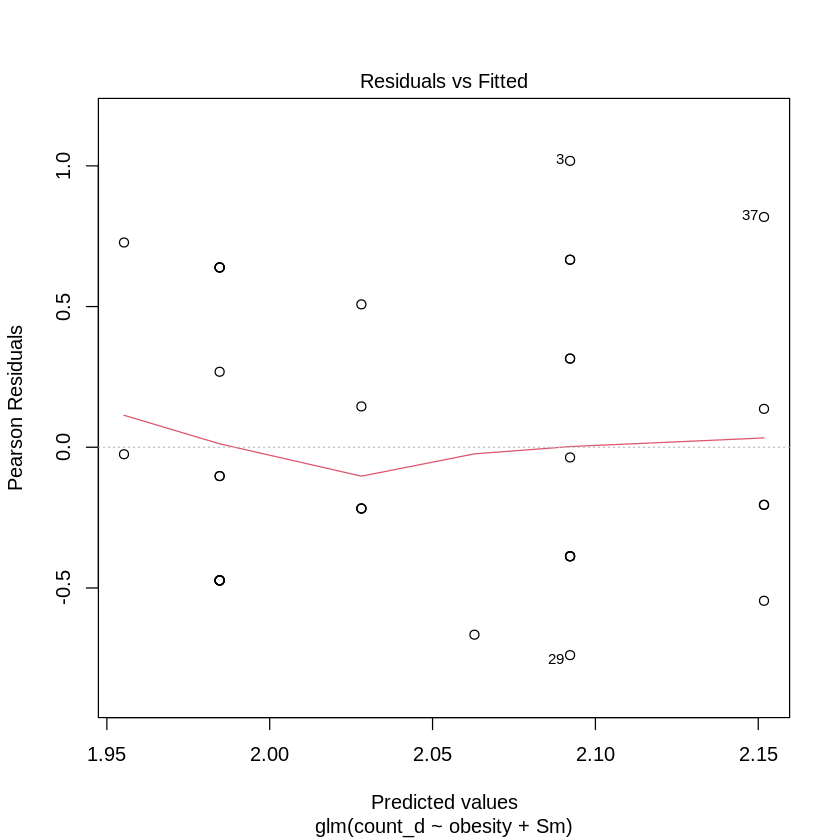

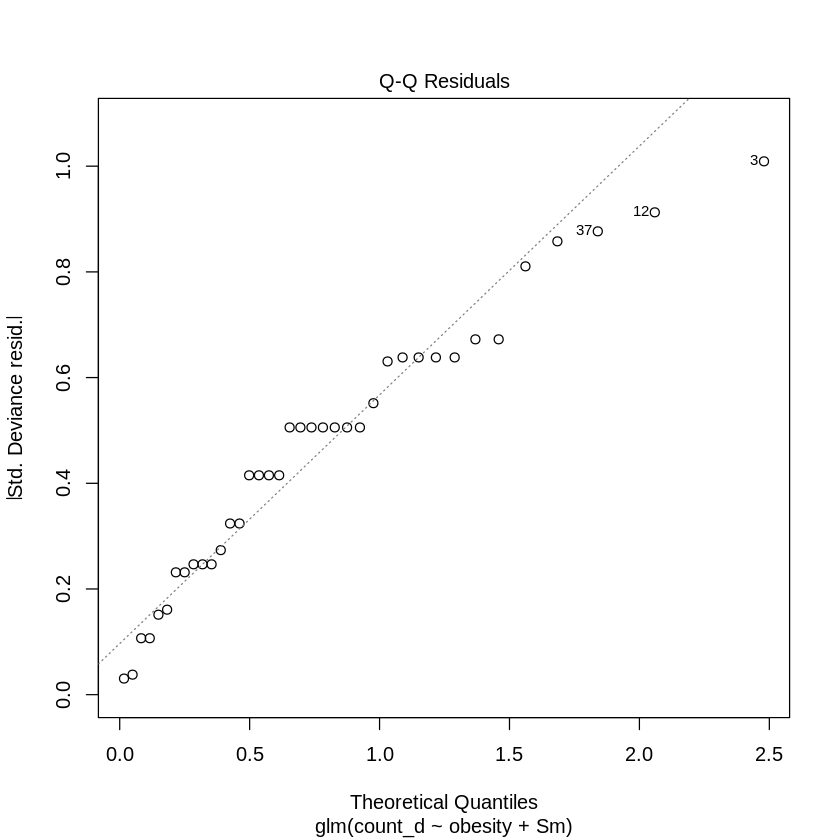

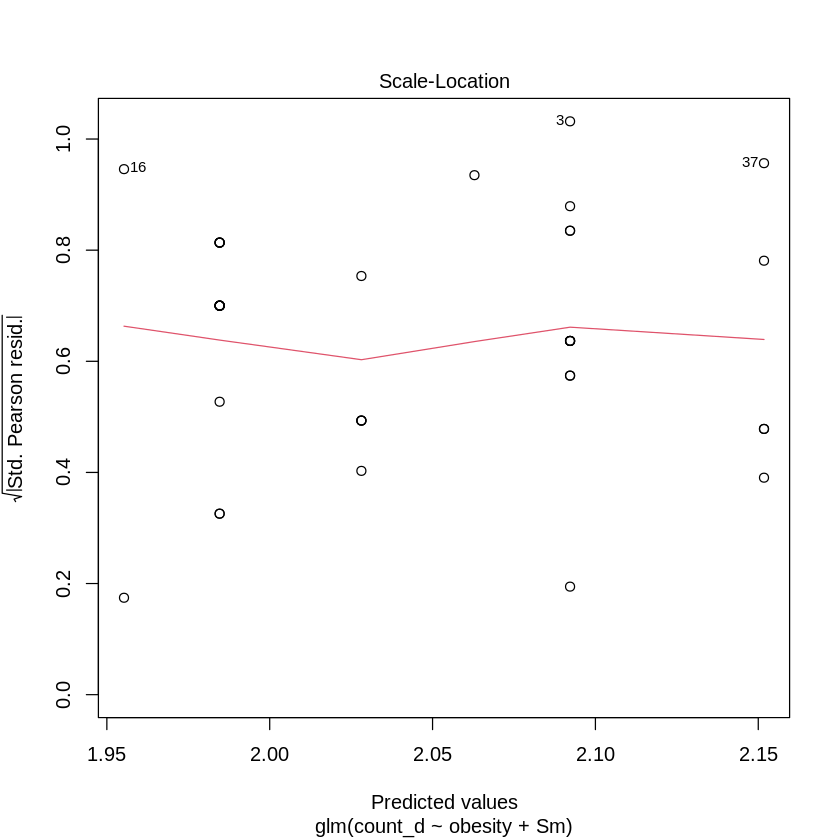

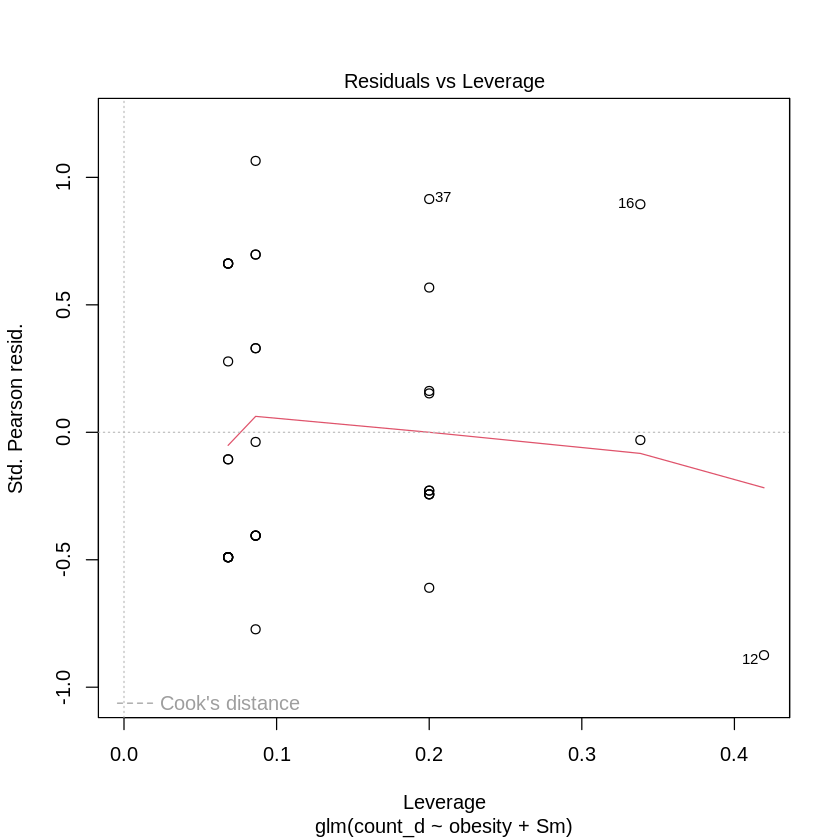

In [ ]:
summary(model)

plot(model)

In [ ]:
new_data$pred_d <- predict(model, type="response")

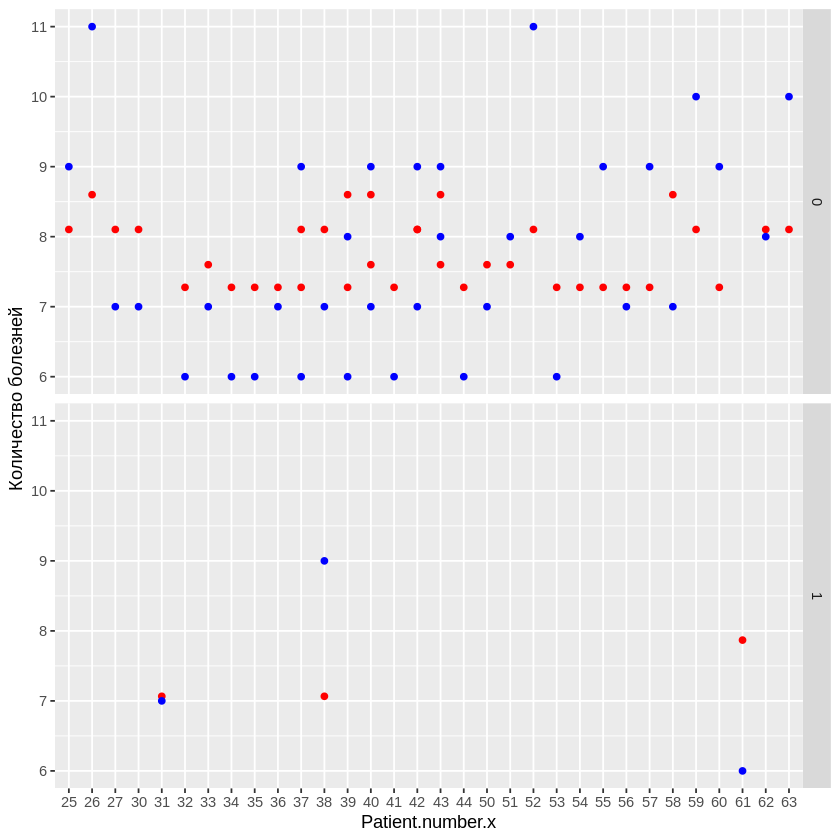

In [ ]:
ggplot(new_data) +
  geom_point(aes(x = Patient.number.x, y = pred_d), colour = 'red') +
  geom_point(aes(x = Patient.number.x, y = count_d), colour = 'blue') +
  facet_grid(new_data$Sm) +
  labs(y = "Количество болезней")

+ библиотека leaps https://rdrr.io/cran/leaps/
выполняет исчерпывающий поиск наилучших подмножеств переменных в данных для прогнозирования, используя линейную регрессию, используя эффективный branch-and-bound алгоритм. Также выбор модели путем исчерпывающего поиска и пошаговой замены.